In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Loading Images

In [3]:
datagen = ImageDataGenerator()

In [4]:
train_generator = datagen.flow_from_directory(
    directory=r"E:\PlantDiesease\train",
    batch_size=32,
    color_mode='grayscale',
    class_mode = 'sparse',
    shuffle=True
)

Found 7771 images belonging to 4 classes.


In [5]:
test_generator = datagen.flow_from_directory(
    directory=r"E:\PlantDiesease\valid",
    batch_size=32,
    color_mode='grayscale',
    class_mode = 'sparse',
    shuffle=True
)

Found 1943 images belonging to 4 classes.


Discover batches which loaded in

(32, 256, 256, 1)


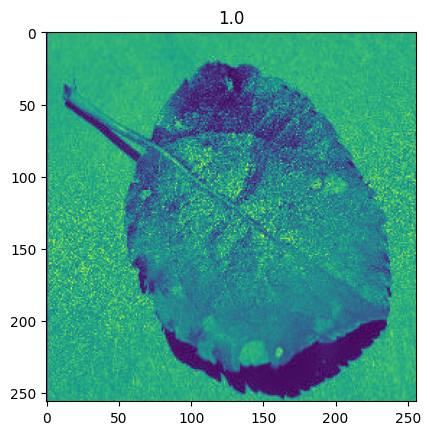

(32, 256, 256, 1)


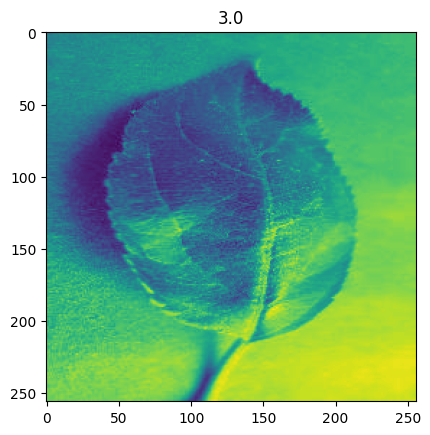

(32, 256, 256, 1)


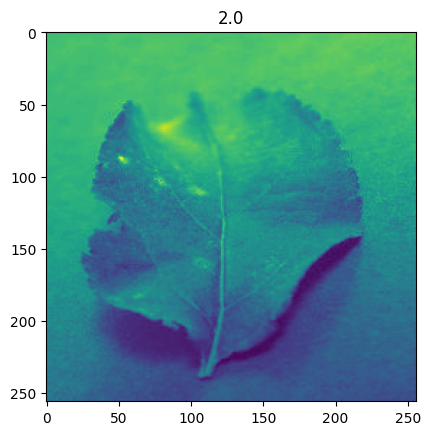

(32, 256, 256, 1)


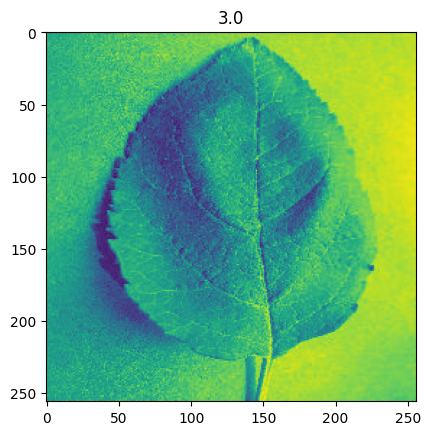

(32, 256, 256, 1)


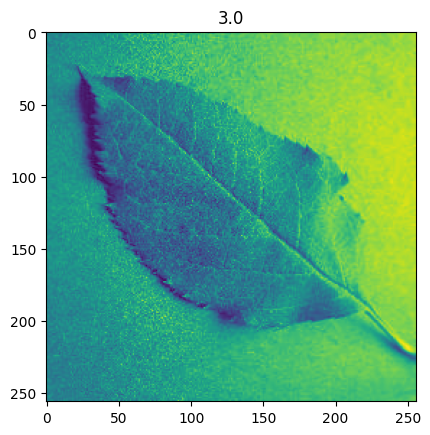

In [6]:
for _ in range(5):
    img, label = train_generator.next()
    print(img.shape)  #  (1,256,256,3)
    plt.title(label[0])
    plt.imshow(img[0]/255)
    plt.show()

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense

In [20]:
model= Sequential()


model.add(Conv2D(32,(3,3), input_shape=(256,256,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation=tf.nn.relu))
model.add(Dense(6,activation=tf.nn.softmax))

In [22]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
modelhistory = model.fit(train_generator, batch_size = 32, verbose =1, epochs=10,validation_data = test_generator)

Epoch 1/10
243/243 [==============================] - 227s 927ms/step - loss: 12.9987 - accuracy: 0.5842 - val_loss: 0.7760 - val_accuracy: 0.7061
Epoch 2/10
243/243 [==============================] - 190s 780ms/step - loss: 0.5570 - accuracy: 0.7932 - val_loss: 1.1433 - val_accuracy: 0.5646
Epoch 3/10
243/243 [==============================] - 190s 782ms/step - loss: 0.3889 - accuracy: 0.8530 - val_loss: 0.6687 - val_accuracy: 0.7571
Epoch 4/10
243/243 [==============================] - 190s 782ms/step - loss: 0.2252 - accuracy: 0.9189 - val_loss: 1.6520 - val_accuracy: 0.6943
Epoch 5/10
243/243 [==============================] - 190s 781ms/step - loss: 0.1956 - accuracy: 0.9313 - val_loss: 0.7862 - val_accuracy: 0.7797
Epoch 6/10
243/243 [==============================] - 185s 763ms/step - loss: 0.0754 - accuracy: 0.9749 - val_loss: 0.9538 - val_accuracy: 0.8121
Epoch 7/10
243/243 [==============================] - 185s 762ms/step - loss: 0.1095 - accuracy: 0.9669 - val_loss: 0.8886 

Metrics!


In [45]:
metric_generator = datagen.flow_from_directory(
    directory=r"E:\PlantDiesease\valid",
    color_mode="grayscale",
    batch_size=32,
    class_mode = 'sparse',
    shuffle=True, 
)

Found 1943 images belonging to 4 classes.


In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report

In [47]:
train_loss = modelhistory.history['loss']
val_loss = modelhistory.history['val_loss']
train_accuracy = modelhistory.history['accuracy']
val_accuracy = modelhistory.history['val_accuracy']

In [48]:
y_pred = model.predict_generator(metric_generator).argmax(axis=-1)

C:\Users\Marcus Ong\AppData\Local\Temp\ipykernel_16252\3854861344.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(metric_generator).argmax(axis=-1)


In [49]:
y_true = metric_generator.classes
if len(y_true) ==  len(y_pred):
    print('Same length')

Same length


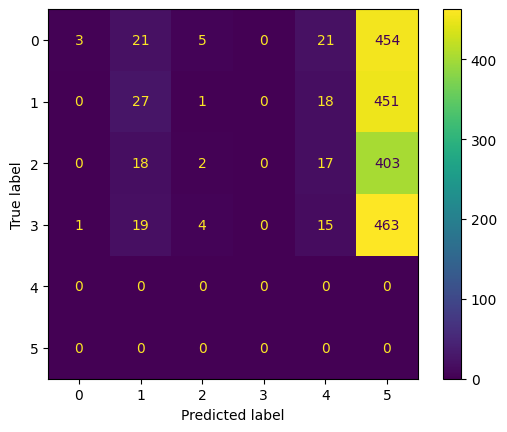

In [51]:
cm = confusion_matrix(y_true,y_pred)
dis = ConfusionMatrixDisplay(cm)
dis.plot()


In [53]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.01      0.01       504
           1       0.32      0.05      0.09       497
           2       0.17      0.00      0.01       440
           3       0.00      0.00      0.00       502
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0

    accuracy                           0.02      1943
   macro avg       0.21      0.01      0.02      1943
weighted avg       0.31      0.02      0.03      1943



e:\PlantDiesease\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\PlantDiesease\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\PlantDiesease\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\PlantDiesease\.venv\Lib\site-packages\sklearn\metrics\_classificat

In [29]:
modelCSV = pd.DataFrame(modelhistory.history)
modelCSV.to_csv('GrayScale.csv')

In [30]:
metricsCSV = pd.read_csv('metrics.csv',index_col=0)

In [31]:
accuracy = accuracy_score(y_true,y_pred)
f1score = f1_score(y_true,y_pred,average='weighted')
recall = recall_score(y_true,y_pred,average='weighted')
precision = precision_score(y_true,y_pred,average='weighted')

e:\PlantDiesease\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\PlantDiesease\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
metricsCSV

,name,accuracy,f1score,recall,precision
0,Resize128&Normalization,0.962944,0.962598,0.962944,0.963481
1,Resize128,0.678332,0.659023,0.678332,0.692577
2,RandomCrop,0.367473,0.300592,0.367473,0.433178
3,Rescaled,0.938240,0.938317,0.938240,0.941528


In [33]:
metricsCSV.loc[len(metricsCSV)] = ['GrayScale',accuracy,f1score,recall,precision]
metricsCSV.to_csv('metrics.csv')

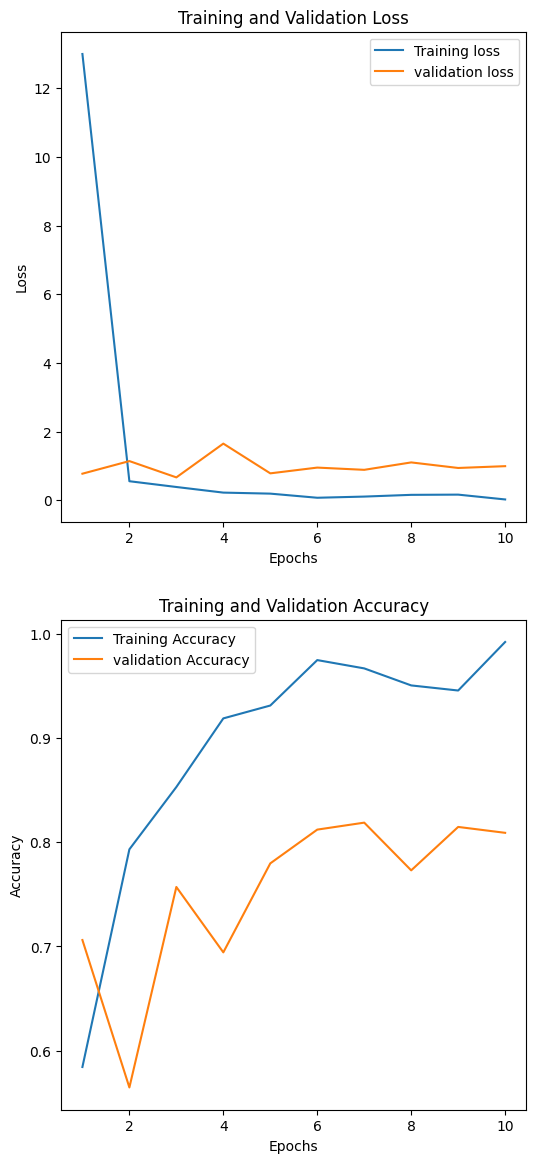

In [34]:
epochs = range(1,11)
plt.figure(figsize=(6,14))

plt.subplot(2,1,1)
plt.plot(epochs, train_loss, label='Training loss')
plt.plot(epochs, val_loss, label='validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.subplot(2,1,2) 
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()